In [15]:
from sklearn.decomposition import LatentDirichletAllocation
from nltk.corpus import stopwords as stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
from datetime import datetime
from matplotlib.pyplot import figure
from pandas.plotting import register_matplotlib_converters
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import praw
import string
import nltk
import math
nltk.download('stopwords')
register_matplotlib_converters()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\granb\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Reddit comments LDA

In [4]:
reddit = praw.Reddit(client_id="", client_secret="", user_agent="PRAW:LDA:0.1")

In [8]:
def LDA_comments(username):
    me = reddit.redditor(username)
    l = list(me.comments.new(limit=None))
    bodies = []
    MIN_LENGTH = 50
    for comment in l:
        if len(comment.body) > MIN_LENGTH:
            bodies.append(comment.body)
    print("Number of comments: {}.\nNumber of valid comments (length > {}): {}\n".format(len(l), MIN_LENGTH, len(bodies)))
    vectorizer = CountVectorizer(strip_accents='unicode', stop_words=stopwords.words('english'), analyzer='word')
    data = vectorizer.fit_transform(bodies)
    lda = LatentDirichletAllocation(n_components=7, doc_topic_prior=1.05, topic_word_prior=1.75, random_state=42)
    lda = lda.fit(data)
    feature_names = vectorizer.get_feature_names()
    for index, topic in enumerate(lda.components_):
        best_words = np.argsort(topic)[::-1][:10]
        word_agg = ""
        for word in best_words:
            word_agg += feature_names[word] + ", "
        print("Topic {}: {}".format(index + 1, word_agg[:-2]))

In [9]:
LDA_comments('Bibibis')

Number of comments: 995.
Number of valid comments (length > 50): 656

Topic 1: side, clones, fix, blue, lane, would, tag, right, bush, better
Topic 2: game, get, one, even, time, would, play, like, cards, make
Topic 3: server, client, work, clients, send, problem, attack, port, master, one
Topic 4: eth, node, price, book, board, stop, page, order, nodes, ground
Topic 5: character, size, redditor, news, reading, element, please, title, stopped, posts
Topic 6: fucking, little, shit, top, think, entire, usa, fuck, comment, know
Topic 7: wyrm, conceal, spells, otk, summons, 118, call, auctioneer, mana, wild


# Per week comment histogram

In [21]:
def comments_histogram(username):
    me = reddit.redditor(username)
    l = list(me.comments.new(limit=None))
    times = []
    TIME_QUANTUM = 60*60*24*7
    for comment in l:
        times.append(comment.created_utc)
    minimum = min(times)
    reduced = []
    for time in times:
        reduced.append(datetime.fromtimestamp(TIME_QUANTUM*math.floor(time/TIME_QUANTUM)))
    counter = Counter(reduced)
    plt.subplots(figsize=(18,5))
    plt.bar(counter.keys(), counter.values(), width=5)
    plt.title("Histogram of {} comments for Reddit user /u/{}".format(len(l),username))
    plt.xlabel("Date")
    plt.ylabel("Number of weekly comments")
    plt.show()

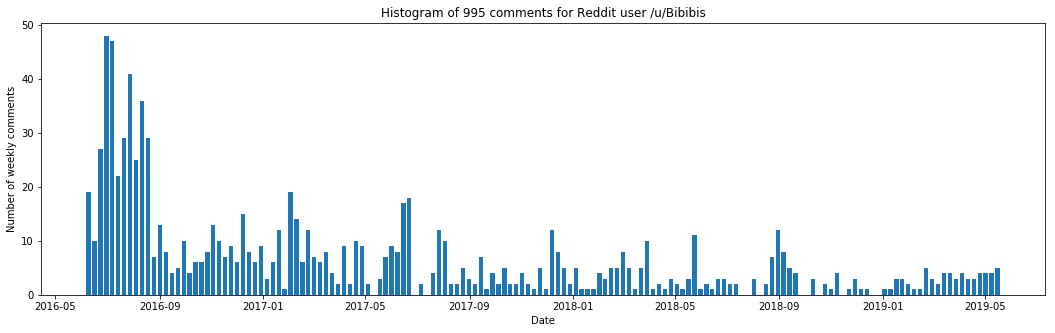

In [26]:
comments_histogram('Bibibis')

# Daily comments posting times

In [51]:
def daily_comments_histogram(username, utc_diff=1):
    me = reddit.redditor(username)
    l = list(me.comments.new(limit=None))
    times = []
    TIME_QUANTUM = 60*60
    for comment in l:
        times.append(comment.created_utc)
    minimum = min(times)
    reduced = []
    for time in times:
        reduced.append((math.floor(time%(60*60*24)/TIME_QUANTUM)+utc_diff)%24)
    counter = Counter(reduced)
    plt.subplots(figsize=(18,5))
    plt.bar(counter.keys(), counter.values())
    plt.xticks([x for x in range(24)], ["{}:00".format(x) for x in range(24)])
    plt.title("Time of the day of {} comments for Reddit user /u/{}".format(len(l),username))
    plt.xlabel("Hour in UTC+{}".format(utc_diff))
    plt.ylabel("Number of comments during hour")
    plt.show()

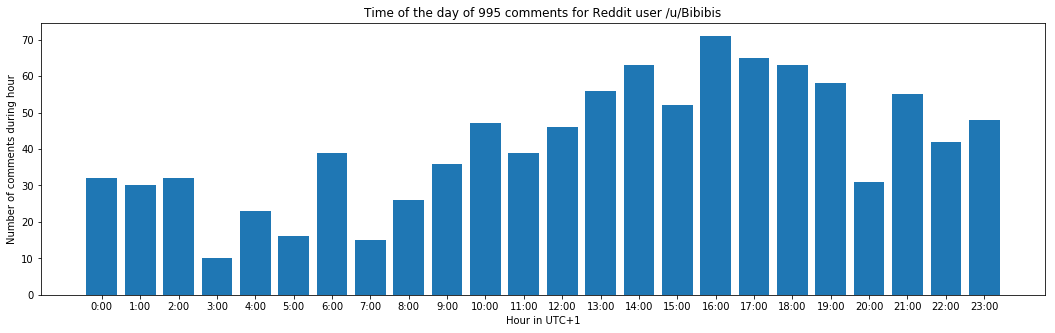

In [55]:
daily_comments_histogram("Bibibis")